# Sentiment Analysis with MultinomialNB for Azerbaijani comments.

In [1]:
# Necessary libraries 
import pandas as pd 
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
# Reading the data
# df  = pd.read_excel("all_sentiments.csv", sheet_name="Table1") 

In [3]:
df1 = pd.read_excel('Comments - edited (modified2) 2.xlsx')

In [4]:
df1.columns

Index(['Comment', 'Sentiment', 'Percentage', 'Topic'], dtype='object')

In [5]:
df1.head()

,Comment,Sentiment,Percentage,Topic
0,"vallah bir ay deyil çəkdiyimiz, 30 dəfə usta g...",Negative,6,Shark Telecom
1,siz nətər insansız neyse 160 manat burnunuzdan...,Negative,8,Shark Telecom
2,hardadi i indi bele saf uwaqlar ve dermanlar,Negative,4,Shark Telecom
3,biz bu gün asif məhərrəmov filialından pendir ...,Negative,5,Neptun Supermarket
4,maraqlidir,Positive,6,Borani Restoran


In [6]:
df1.shape

(44361, 4)

In [7]:
df2 = pd.read_excel('exported_with_predictions.xlsx')

In [8]:
df2.head()

,Unnamed: 0,Comment_prev,Comment,predicted
0,0,Ozu.,özü,Neutral
1,1,Eve.,evə,Neutral
2,2,Esx.,eşq,Neutral
3,3,Ela.,əla,Positive
4,4,Men.,mən,Neutral


In [9]:
df2.columns

Index(['Unnamed: 0', 'Comment_prev', 'Comment', 'predicted'], dtype='object')

In [10]:
df2.columns = ['Index', 'Comment_prev', 'Comment', 'Sentiment']

In [11]:
df2.head()

,Index,Comment_prev,Comment,Sentiment
0,0,Ozu.,özü,Neutral
1,1,Eve.,evə,Neutral
2,2,Esx.,eşq,Neutral
3,3,Ela.,əla,Positive
4,4,Men.,mən,Neutral


In [12]:
df2.shape

(19950, 4)

In [13]:
# Reading the data from google drive, this is for working with google colab
# import os
# from google.colab import drive
# drive.mount("/content/drive/")
# os.chdir('/content/drive/My Drive/')
# df_bank = pd.read_excel("Comments_all_bank.xlsx")

In [14]:
# df_bank.head()

In [15]:
# df_bank.shape

In [16]:
# Randomly delete 80% of the neutral rows
# neutral_rows= df_bank[df_bank['Sentiment'] == 'Neutral']

# delete_rows = np.random.choice(neutral_rows.index, size=int(len(neutral_rows)*0.8), replace=False)
# df_bank = df_bank.drop(delete_rows)


In [17]:
# df_bank.shape

In [18]:
df = pd.concat([df1[["Comment", "Sentiment"]], df2[["Comment", "Sentiment"]]], ignore_index=True)

In [19]:
#df.columns = ["Comment", "Sentiment"]

In [20]:
df.head()

,Comment,Sentiment
0,"vallah bir ay deyil çəkdiyimiz, 30 dəfə usta g...",Negative
1,siz nətər insansız neyse 160 manat burnunuzdan...,Negative
2,hardadi i indi bele saf uwaqlar ve dermanlar,Negative
3,biz bu gün asif məhərrəmov filialından pendir ...,Negative
4,maraqlidir,Positive


In [21]:
df.shape

(64311, 2)

In [22]:
# Working with only relevant columns
df = df[["Comment", "Sentiment"]]

In [23]:
df.head()

,Comment,Sentiment
0,"vallah bir ay deyil çəkdiyimiz, 30 dəfə usta g...",Negative
1,siz nətər insansız neyse 160 manat burnunuzdan...,Negative
2,hardadi i indi bele saf uwaqlar ve dermanlar,Negative
3,biz bu gün asif məhərrəmov filialından pendir ...,Negative
4,maraqlidir,Positive


In [24]:
df.shape

(64311, 2)

In [25]:
# Do we have NA in data?
df.isna().sum()

Comment         55
Sentiment    18989
dtype: int64

In [26]:
# Deleting the rows that have NA
df.dropna(inplace=True)

In [27]:
# resetting index
df.reset_index(drop=True, inplace=True)

In [28]:
df.shape # We have 13522 labeled sentences

(45270, 2)

In [29]:
df.head()

,Comment,Sentiment
0,"vallah bir ay deyil çəkdiyimiz, 30 dəfə usta g...",Negative
1,siz nətər insansız neyse 160 manat burnunuzdan...,Negative
2,hardadi i indi bele saf uwaqlar ve dermanlar,Negative
3,biz bu gün asif məhərrəmov filialından pendir ...,Negative
4,maraqlidir,Positive


<Axes: xlabel='Sentiment', ylabel='count'>

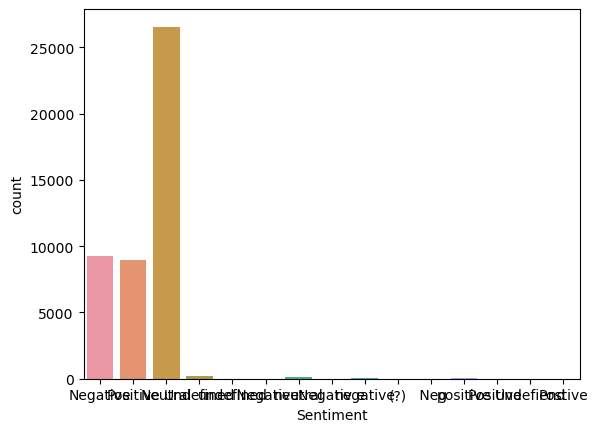

In [30]:
# It seems you made a mistake while labeling 
sns.countplot(x = "Sentiment", data = df)

In [31]:
df["Sentiment"].value_counts()

Neutral      26565
Negative      9240
Positive      8989
Undefined      227
neutral        154
negative        54
positive        23
Positive         5
Postive          4
 Negative        3
(?)              2
undefined        1
Negativ e        1
 Neg             1
Undefiend        1
Name: Sentiment, dtype: int64

In [32]:
df["Sentiment"].unique()

array(['Negative', 'Positive', 'Neutral', 'Undefined', 'undefined',
       ' Negative', 'neutral', 'Negativ e', 'negative', '(?)', ' Neg',
       'positive', 'Positive ', 'Undefiend', 'Postive'], dtype=object)

In [33]:
# Deleting the rows that their sentiment column is --> Undefined, (?),  Undefiend, undefined
df.loc[df['Sentiment'].isin(['Undefined', '(?)', 'Undefiend', 'undefined'])]
# Totally 301 rows

,Comment,Sentiment
130,сен онларын чавабыны козле,Undefined
140,@seqlb bəs rusiyaya bu qədər lənət deyirsənsə ...,Undefined
144,bunkerdən çıx,Undefined
164,@nigarturan169 hede gerey sosiska yeyesiz gedi...,Undefined
241,yaziğin dili çixdi işlemekdem,Undefined
...,...,...
12834,şənbə e-moizəsini başladı virtual sufi:- özünü...,Undefined
12835,necə istəyirsən,Undefined
12852,şəbiynən mesajlarımızı görsəz elə bil 2 sevgil...,Undefined
12862,harda çox sayda hüq…,Undefined


In [34]:
# Taking their indexes to delete
must_delete = df.loc[df['Sentiment'].isin(['Undefined', '(?)', 'Undefiend', 'undefined', 'ne', 'neh'])].index

In [35]:
df.drop(must_delete, inplace=True)

In [36]:
df.shape # Deleted 301 rows

(45039, 2)

In [37]:
df.reset_index(inplace=True, drop="True")

In [38]:
df.head()

,Comment,Sentiment
0,"vallah bir ay deyil çəkdiyimiz, 30 dəfə usta g...",Negative
1,siz nətər insansız neyse 160 manat burnunuzdan...,Negative
2,hardadi i indi bele saf uwaqlar ve dermanlar,Negative
3,biz bu gün asif məhərrəmov filialından pendir ...,Negative
4,maraqlidir,Positive


In [39]:
df["Sentiment"].value_counts()

Neutral      26565
Negative      9240
Positive      8989
neutral        154
negative        54
positive        23
Positive         5
Postive          4
 Negative        3
Negativ e        1
 Neg             1
Name: Sentiment, dtype: int64

In [40]:
df["Sentiment"].unique()

array(['Negative', 'Positive', 'Neutral', ' Negative', 'neutral',
       'Negativ e', 'negative', ' Neg', 'positive', 'Positive ',
       'Postive'], dtype=object)

In [41]:
# Changing negative, Neg, Negativ e to Negative
df.loc[df['Sentiment'].isin(['Negativ e', ' Negative', 'negative', ' Neg'])]

,Comment,Sentiment
590,😥,Negative
2825,gözlərivi yox gözlərini olmalidi,Negativ e
2962,simnar xanın allah cəsasını versin🤬😠😡😤😈,negative
2984,bacarırlar belə kinolar çəksinlər ey neçə illə...,negative
3013,insanin hovselesi catmir qulaq asmaga,negative
3016,bir sözü 50 defe deme ne olar,negative
3017,men etim unu ölçusunu sef deyir,negative
3064,"her shey yaxshidi ,amma chox danishmaq 0 !!! y...",negative
3065,ses adami bezdirir,negative
3107,ağzını çox marcildadir hövsələm çatmadı baxmağ...,negative


In [42]:
df["Sentiment"] = df["Sentiment"].replace(['Negativ e', ' Negative', 'negative', ' Neg'], "Negative")

In [43]:
df["Sentiment"].value_counts()

Neutral      26565
Negative      9299
Positive      8989
neutral        154
positive        23
Positive         5
Postive          4
Name: Sentiment, dtype: int64

In [44]:
df["Sentiment"].unique()

array(['Negative', 'Positive', 'Neutral', 'neutral', 'positive',
       'Positive ', 'Postive'], dtype=object)

In [45]:
df["Sentiment"] = df["Sentiment"].replace(['neutral', ' Neutral', 'Neutal'], 'Neutral')

In [46]:
df["Sentiment"].value_counts()

Neutral      26719
Negative      9299
Positive      8989
positive        23
Positive         5
Postive          4
Name: Sentiment, dtype: int64

In [47]:
df["Sentiment"].unique()

array(['Negative', 'Positive', 'Neutral', 'positive', 'Positive ',
       'Postive'], dtype=object)

In [48]:
df["Sentiment"] = df["Sentiment"].replace(['positive', 'Positive ', 'Postive'], 'Positive')

In [49]:
df["Sentiment"].value_counts() # Now you have 3 sentiments

Neutral     26719
Negative     9299
Positive     9021
Name: Sentiment, dtype: int64

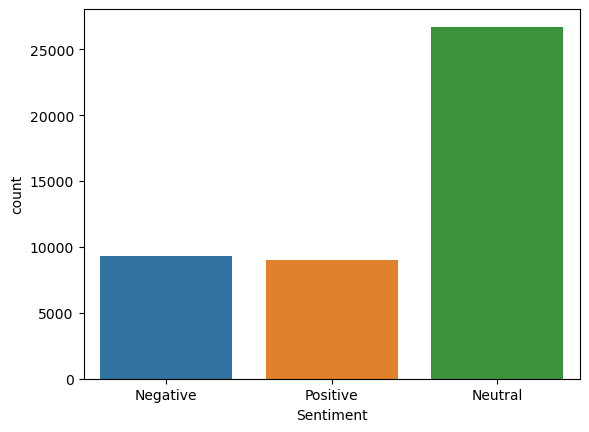

In [50]:
sns.countplot(x = "Sentiment", data = df); # General distribution

In [51]:
df.reset_index(inplace=True, drop=True)

# Modeling

In [52]:
df["Sentiment"].value_counts() # Now you have 3 labels in df

Neutral     26719
Negative     9299
Positive     9021
Name: Sentiment, dtype: int64

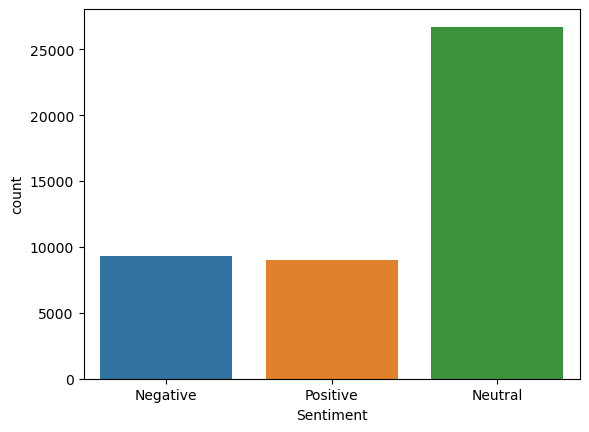

In [53]:
sns.countplot(x = "Sentiment", data = df); # A bit unbalance it is better to make balanced

# Text Pre-Processing
* Steps
    * 1. Lower Casing : Convert all words into the lower case because the upper or lower case may not make a difference for the problem. And we are reducing vocabulary size by doing so.
    * 2. Tokenization : NLP software typically analyzes text by breaking it up into words (tokens) and sentences.
    * 3.  Stemming : Stemming refers to the process of removing suffixes and reducing a word to some base form such that all different variants of that word can be represented by the same form (e.g., “walk” and “walking” are both reduced to “walk”).
    


In [54]:
# Lowercasing all the texts
df.head()

,Comment,Sentiment
0,"vallah bir ay deyil çəkdiyimiz, 30 dəfə usta g...",Negative
1,siz nətər insansız neyse 160 manat burnunuzdan...,Negative
2,hardadi i indi bele saf uwaqlar ve dermanlar,Negative
3,biz bu gün asif məhərrəmov filialından pendir ...,Negative
4,maraqlidir,Positive


In [55]:
df["Comment"] = df['Comment'].str.replace("I", "ı").replace("İ", "i") # will be done for other letters 
df["Comment"] = df['Comment'].str.lower()

In [56]:
df.head(5) # Lowercased

,Comment,Sentiment
0,"vallah bir ay deyil çəkdiyimiz, 30 dəfə usta g...",Negative
1,siz nətər insansız neyse 160 manat burnunuzdan...,Negative
2,hardadi i indi bele saf uwaqlar ve dermanlar,Negative
3,biz bu gün asif məhərrəmov filialından pendir ...,Negative
4,maraqlidir,Positive


In [57]:
# Tokenization
def tokenize_sentence_into_words(string):
    str_SEN = ""
    str_ = ""
    string = string.strip()
    len_str = len(string)
    string += ' '
    char_index = -1
    for char in string:
        char_index += 1
        dot_sep = (char == "." and char_index != len_str - 1)

        if char.isnumeric() or char.isalpha() or char == "-" or char == "–" or dot_sep:

            str_ += char

        else:
            if str_ != "":
                str_SEN += str_ + " "
                str_ = ""
            if char != " ":
                str_SEN += char + " "
    final_str = ""
    for word in str_SEN.strip().split():
        final_str += word.strip(",.") + " "
    return " ".join(final_str.strip().split())

In [58]:
import string

In [59]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [60]:
translator=str.maketrans('','',string.punctuation)
df["Comment"]=df["Comment"].str.translate(translator)


In [61]:
df["Comment"]

0        vallah bir ay deyil çəkdiyimiz 30 dəfə usta gə...
1        siz nətər insansız neyse 160 manat burnunuzdan...
2             hardadi i indi bele saf uwaqlar ve dermanlar
3        biz bu gün asif məhərrəmov filialından pendir ...
4                                               maraqlidir
                               ...                        
45034                      qəşəng söyərdim bunu yeri deyil
45035                                            mədəni ol
45036    filmlər o qədər möhtəşəm şeylərdir ki tarix ye...
45037                mənə niyə telefonu cevirttirdinnnn dd
45038    yaxşı muğam oxuyan ola oturasan böyründə qulaq...
Name: Comment, Length: 45039, dtype: object

In [62]:
df.reset_index(inplace=True, drop=True)

In [63]:
for i in range(df.shape[0]):
    if df["Comment"][i] != str(df["Comment"][i]):
        continue
    df.at[i, "Comment"] = tokenize_sentence_into_words(df["Comment"][i])


In [64]:
df.head()

,Comment,Sentiment
0,vallah bir ay deyil çəkdiyimiz 30 dəfə usta gə...,Negative
1,siz nətər insansız neyse 160 manat burnunuzdan...,Negative
2,hardadi i indi bele saf uwaqlar ve dermanlar,Negative
3,biz bu gün asif məhərrəmov filialından pendir ...,Negative
4,maraqlidir,Positive


In [65]:
df['Comment'] = df['Comment'].values.astype('str')

In [66]:
df['Comment']

0        vallah bir ay deyil çəkdiyimiz 30 dəfə usta gə...
1        siz nətər insansız neyse 160 manat burnunuzdan...
2             hardadi i indi bele saf uwaqlar ve dermanlar
3        biz bu gün asif məhərrəmov filialından pendir ...
4                                               maraqlidir
                               ...                        
45034                      qəşəng söyərdim bunu yeri deyil
45035                                            mədəni ol
45036    filmlər o qədər möhtəşəm şeylərdir ki tarix ye...
45037                mənə niyə telefonu cevirttirdinnnn dd
45038    yaxşı muğam oxuyan ola oturasan böyründə qulaq...
Name: Comment, Length: 45039, dtype: object

# CountVectorizer (Representing the string in numerical form)

### Pipeline with CountVectorizer

In [67]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [68]:
text_clf = Pipeline([("vec", CountVectorizer(analyzer="char_wb", ngram_range=(3, 4))),
                     ("clf",MultinomialNB())])


In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df['Comment'], df['Sentiment'],test_size = 0.2,random_state = 42)


In [70]:
text_clf.fit(x_train, y_train)

Pipeline(steps=[('vec',
                 CountVectorizer(analyzer='char_wb', ngram_range=(3, 4))),
                ('clf', MultinomialNB())])

## Predict

In [71]:
text_clf.predict(["bu çox pis videodur !!!"])

array(['Positive'], dtype='<U8')

In [72]:
text_clf.predict(["bu çox əla videodur !!!"])

array(['Positive'], dtype='<U8')

In [73]:
text_clf.predict(["salam. menim akkauntumda problem var"])

array(['Negative'], dtype='<U8')

## Scoring

In [74]:
text_clf.score(x_train,y_train)

0.7657295106991202

In [75]:
text_clf.score(x_test,y_test) # Accuracy

0.7099245115452931

In [76]:
y_pred = text_clf.predict(x_test)

In [77]:
y_pred

array(['Negative', 'Neutral', 'Neutral', ..., 'Positive', 'Neutral',
       'Positive'], dtype='<U8')

In [78]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.53      0.55      0.54      1855
     Neutral       0.79      0.76      0.78      5297
    Positive       0.67      0.72      0.69      1856

    accuracy                           0.71      9008
   macro avg       0.67      0.68      0.67      9008
weighted avg       0.71      0.71      0.71      9008



## Confusion matrix

In [108]:
from sklearn.metrics import plot_confusion_matrix

[[ 507 1632   25]
 [ 186 5601   95]
 [  49 1133  757]]


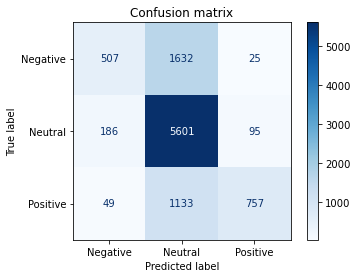

In [109]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
disp = plot_confusion_matrix(text_clf, x_test, y_test,
                                 cmap=plt.cm.Blues,
                            )
disp.ax_.set_title("Confusion matrix")

print(disp.confusion_matrix)

plt.show()

## Saving to pickle file

In [110]:
import pickle

In [112]:
filename='tfidf_multinomialnb.pkl'

In [113]:
with open(filename,'wb') as file:
    pickle.dump(text_clf, file)

## Testing pickle file

In [114]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [115]:
filename='tfidf_multinomialnb.pkl'

In [116]:
with open(filename,'rb') as file:
    text_clf = pickle.load(file)

In [117]:
text_clf.predict(["bu çox pis videodur !!!"])

array(['Neutral'], dtype='<U8')

In [118]:
text_clf.predict(["bu çox əla videodur !!!"])

array(['Neutral'], dtype='<U8')

In [119]:
text_clf.predict(["salam. menim akkauntumda problem var"])

array(['Negative'], dtype='<U8')